In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

FILE = "medical_insurance.csv"   # cambia al nombre real
SEP = ","

df = pd.read_csv(FILE, sep=SEP)

print(df.head())
print(df.info())
print(df.describe())
print(df.isna().sum())

   person_id  age     sex   region urban_rural   income     education  \
0      75722   52  Female    North    Suburban  22700.0     Doctorate   
1      80185   79  Female    North       Urban  12800.0         No HS   
2      19865   68    Male    North       Rural  40700.0            HS   
3      76700   15    Male    North    Suburban  15600.0  Some College   
4      92992   53    Male  Central    Suburban  89600.0     Doctorate   

  marital_status employment_status  household_size  ...  liver_disease  \
0        Married           Retired               3  ...              0   
1        Married          Employed               3  ...              0   
2        Married           Retired               5  ...              0   
3        Married     Self-employed               5  ...              0   
4        Married     Self-employed               2  ...              0   

   arthritis mental_health proc_imaging_count  proc_surgery_count  \
0          1             0                  1  

# 1 Visualizaciones iniciales y exploración de los datos

Visualizaciones

In [14]:
TARGET = "is_high_risk"


In [15]:
CAT_COLS = [
    "sex",
    "region",
    "urban_rural",
    "education",
    "marital_status",
    "employment_status",
    "smoker",
    "alcohol_freq",
    "plan_type",
    "network_tier"
]

NUM_COLS = [
    "age",
    "income",
    "household_size",
    "dependents",
    "bmi",
    "visits_last_year",
    "hospitalizations_last_3yrs",
    "days_hospitalized_last_3yrs",
    "medication_count",
    "systolic_bp",
    "diastolic_bp",
    "ldl",
    "hba1c",
    "deductible",
    "copay",
    "policy_term_years",
    "policy_changes_last_2yrs",
    "provider_quality",
    "risk_score",
    "annual_medical_cost",
    "annual_premium",
    "monthly_premium",
    "claims_count",
    "avg_claim_amount",
    "total_claims_paid",
    "chronic_count"
]


1. Tasa de alto riesgo por región

Objetivo: Analizar si ciertas regiones concentran más pacientes de alto riesgo.
Esto permite justificar estrategias distintas por región: más recursos, programas preventivos específicos o ajustes de primas. También me permite ver si en ciertas regiones puede haber patrones de comportamiento más saludables que influyen en que haya que ir menos (por ejemplo cultura healthy como en California)

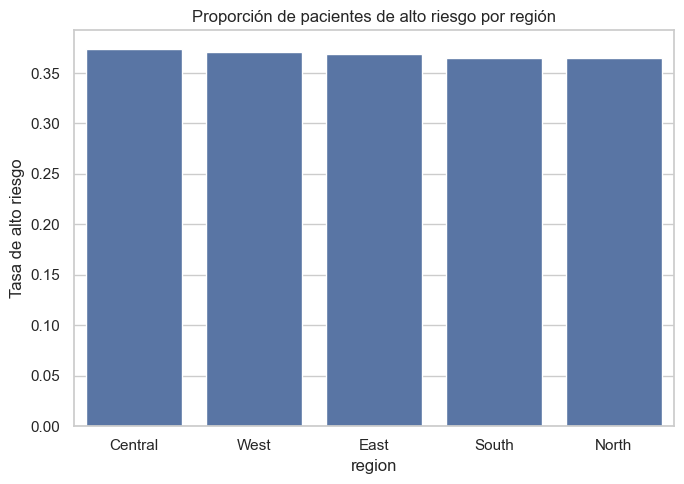

In [ ]:
rate_region = (
    df.groupby("region")[TARGET]
      .mean()
      .reset_index(name="rate")
      .sort_values("rate", ascending=False)
)

plt.figure(figsize=(7,5))
sns.barplot(data=rate_region, x="region", y="rate")
plt.title("Proporción de pacientes de alto riesgo por región")
plt.ylabel("Tasa de alto riesgo")
plt.tight_layout()
plt.show()

2.Coste médico anual según si el cliente es de alto riesgo

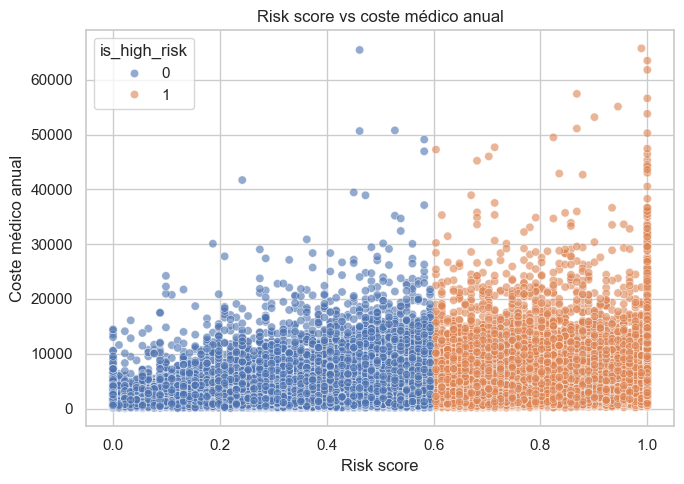

In [16]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="risk_score", y="annual_medical_cost", hue=TARGET, alpha=0.6)
plt.title("Risk score vs coste médico anual")
plt.xlabel("Risk score")
plt.ylabel("Coste médico anual")
plt.tight_layout()
plt.show()


3. Por plan type para ver si tenemos que reorganizar planes

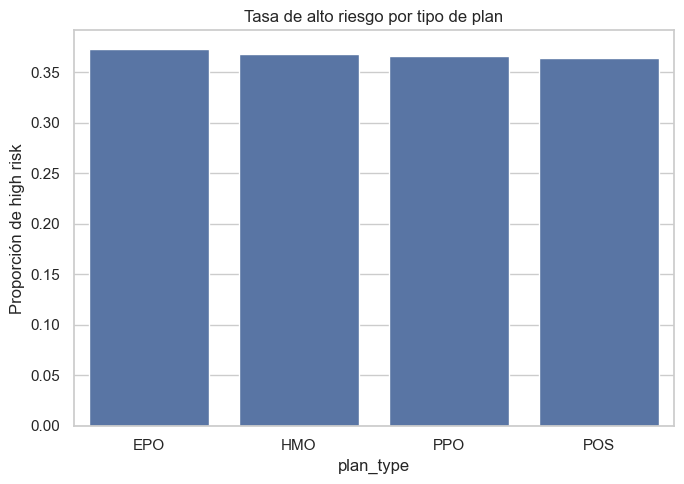

In [17]:
rate_plan = (
    df.groupby("plan_type")[TARGET]
      .mean()
      .reset_index(name="rate")
      .sort_values("rate", ascending=False)
)

plt.figure(figsize=(7,5))
sns.barplot(data=rate_plan, x="plan_type", y="rate")
plt.title("Tasa de alto riesgo por tipo de plan")
plt.ylabel("Proporción de high risk")
plt.tight_layout()
plt.show()


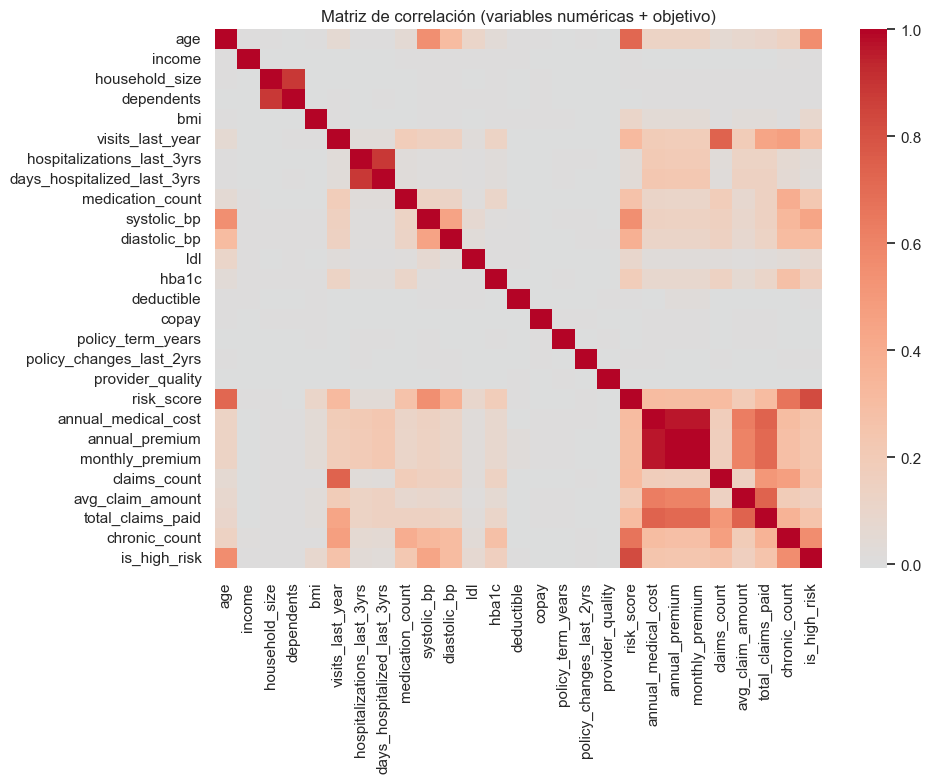

In [18]:
plt.figure(figsize=(10,8))
corr = df[NUM_COLS + [TARGET]].corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matriz de correlación (variables numéricas + objetivo)")
plt.tight_layout()
plt.show()


5.Consumo de alcohol y riesgo

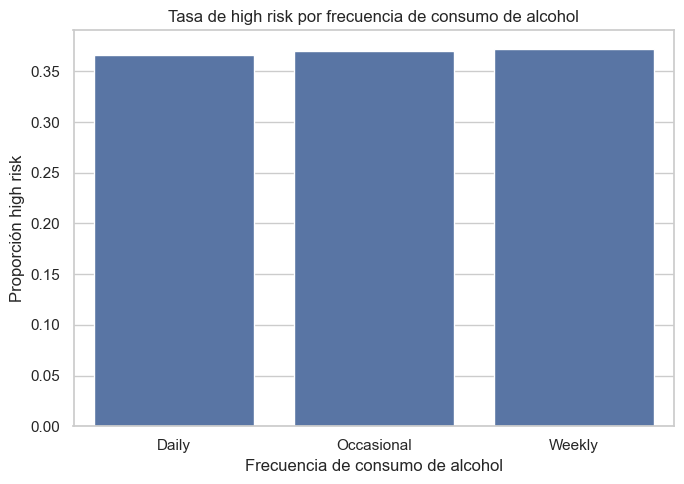

In [19]:
rate_alcohol = df.groupby("alcohol_freq")[TARGET].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data=rate_alcohol, x="alcohol_freq", y=TARGET, order=rate_alcohol.sort_values(TARGET)["alcohol_freq"])
plt.title("Tasa de high risk por frecuencia de consumo de alcohol")
plt.xlabel("Frecuencia de consumo de alcohol")
plt.ylabel("Proporción high risk")
plt.tight_layout()
plt.show()


Tabaquismo y riesgo 

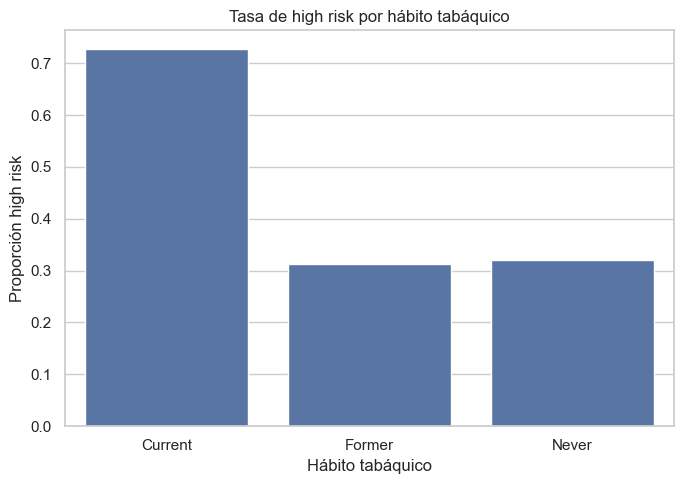

In [20]:
rate_smoke = df.groupby("smoker")[TARGET].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data=rate_smoke, x="smoker", y=TARGET)
plt.title("Tasa de high risk por hábito tabáquico")
plt.xlabel("Hábito tabáquico")
plt.ylabel("Proporción high risk")
plt.tight_layout()
plt.show()


Actividad fisica y riesgo 

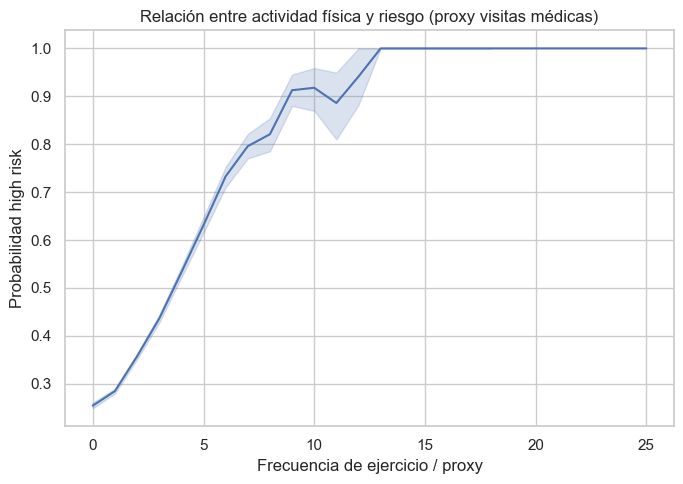

In [22]:

plt.figure(figsize=(7,5))
sns.lineplot(data=df, x="visits_last_year", y=TARGET)
plt.title("Relación entre actividad física y riesgo (proxy visitas médicas)")
plt.xlabel("Frecuencia de ejercicio / proxy")
plt.ylabel("Probabilidad high risk")
plt.tight_layout()
plt.show()


# 2 DASHBOARD

c:\Users\adeyarza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\adeyarza\AppData\Local\Temp\ipykernel_46176\2105995279.py:150: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\adeyarza\AppData\Local\Temp\ipykernel_46176\2105995279.py:164: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will 

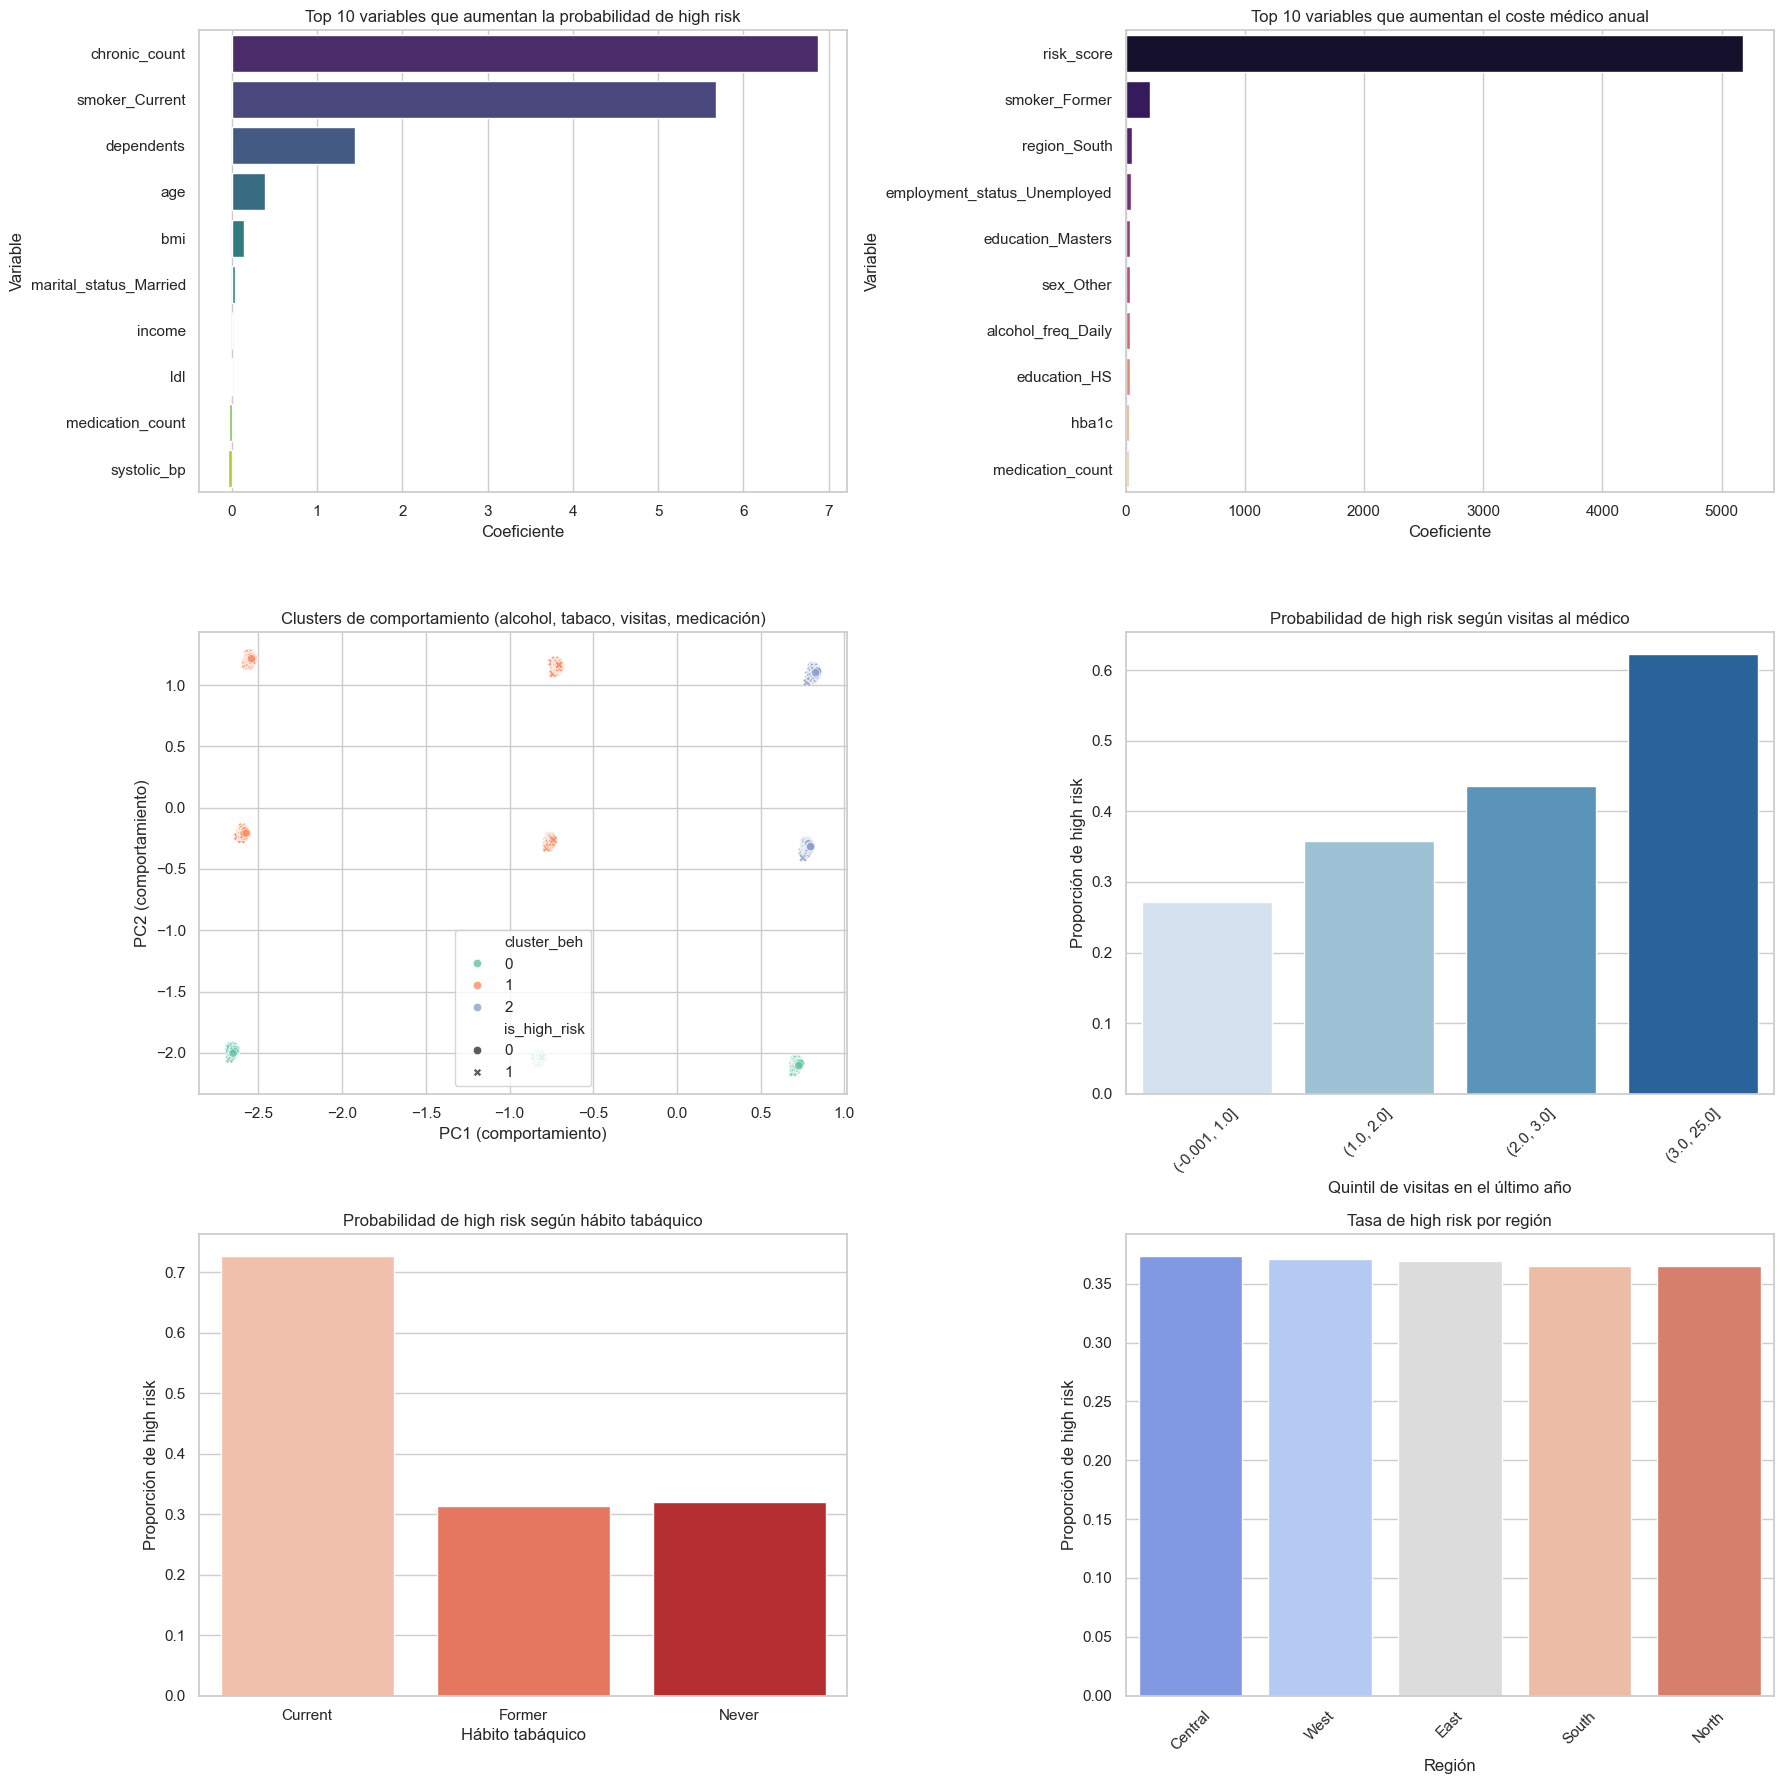

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

sns.set(style="whitegrid")


df = pd.read_csv("medical_insurance.csv")  # cambia el nombre si hace falta

TARGET = "is_high_risk"


CAT_COLS = [
    "sex", "region", "urban_rural", "education", "marital_status",
    "employment_status", "smoker", "alcohol_freq",
    "plan_type", "network_tier"
]

NUM_COLS_CLF = [
    "age","income","household_size","dependents","bmi",
    "medication_count",
    "systolic_bp","diastolic_bp","ldl","hba1c",
    "chronic_count"
]

NUM_COLS_REG = [
    "age","income","household_size","dependents","bmi","medication_count",
    "systolic_bp","diastolic_bp","ldl","hba1c",
    "provider_quality","risk_score",
]


NUM_COLS_CLF = [c for c in NUM_COLS_CLF if c in df.columns]
NUM_COLS_REG = [c for c in NUM_COLS_REG if c in df.columns]
CAT_COLS = [c for c in CAT_COLS if c in df.columns]

X_clf = df[CAT_COLS + NUM_COLS_CLF].copy()
y_clf = df[TARGET]

preprocess_clf = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), CAT_COLS),
        ("num", "passthrough", NUM_COLS_CLF)
    ]
)

log_reg = LogisticRegression(max_iter=5000)

pipe_clf = Pipeline(steps=[
    ("prep", preprocess_clf),
    ("model", log_reg)
])

X_train, X_test, y_train, y_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

pipe_clf.fit(X_train, y_train)


logreg = pipe_clf.named_steps["model"]
ohe_clf = pipe_clf.named_steps["prep"].named_transformers_["cat"]
cat_feature_names_clf = ohe_clf.get_feature_names_out(CAT_COLS)
all_features_clf = list(cat_feature_names_clf) + NUM_COLS_CLF
coefs_clf = logreg.coef_[0]

coef_classif_df = pd.DataFrame({
    "feature": all_features_clf,
    "coef": coefs_clf
}).sort_values("coef", ascending=False)


TARGET_REG = "annual_medical_cost"
y_reg = df[TARGET_REG]
X_reg = df[CAT_COLS + NUM_COLS_REG].copy()

preprocess_reg = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), CAT_COLS),
        ("num", "passthrough", NUM_COLS_REG)
    ]
)

lin_reg = LinearRegression()

pipe_reg = Pipeline(steps=[
    ("prep", preprocess_reg),
    ("model", lin_reg)
])

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

pipe_reg.fit(Xr_train, yr_train)

# Importancia de variables (regresión)
linreg = pipe_reg.named_steps["model"]
ohe_reg = pipe_reg.named_steps["prep"].named_transformers_["cat"]
cat_feature_names_reg = ohe_reg.get_feature_names_out(CAT_COLS)
all_features_reg = list(cat_feature_names_reg) + NUM_COLS_REG
coefs_reg = linreg.coef_

coef_reg_df = pd.DataFrame({
    "feature": all_features_reg,
    "coef": coefs_reg
}).sort_values("coef", ascending=False)


beh_vars = ["alcohol_freq", "smoker", "visits_last_year", "medication_count"]
beh_vars = [c for c in beh_vars if c in df.columns]

df_beh = pd.get_dummies(df[beh_vars], drop_first=True)

scaler_beh = StandardScaler()
X_beh_scaled = scaler_beh.fit_transform(df_beh)

pca_beh = PCA(n_components=2)
X_beh_pca = pca_beh.fit_transform(X_beh_scaled)
df["PC1_beh"] = X_beh_pca[:, 0]
df["PC2_beh"] = X_beh_pca[:, 1]

kmeans_beh = KMeans(n_clusters=3, random_state=0)
df["cluster_beh"] = kmeans_beh.fit_predict(X_beh_scaled)


fig, axes = plt.subplots(3, 2, figsize=(18, 18))
axes = axes.flatten()

# 1. Importancia clasificación (top 10)
top_classif = coef_classif_df.head(10)

sns.barplot(
    data=top_classif,
    x="coef",
    y="feature",
    ax=axes[0],
    palette="viridis"
)
axes[0].set_title("Top 10 variables que aumentan la probabilidad de high risk")
axes[0].set_xlabel("Coeficiente")
axes[0].set_ylabel("Variable")

# 2. Importancia regresión (top 10)
top_reg = coef_reg_df.head(10)

sns.barplot(
    data=top_reg,
    x="coef",
    y="feature",
    ax=axes[1],
    palette="magma"
)
axes[1].set_title("Top 10 variables que aumentan el coste médico anual")
axes[1].set_xlabel("Coeficiente")
axes[1].set_ylabel("Variable")

# 3. Clustering comportamiento
sns.scatterplot(
    data=df,
    x="PC1_beh",
    y="PC2_beh",
    hue="cluster_beh",
    style=TARGET,
    palette="Set2",
    ax=axes[2],
    alpha=0.8
)
axes[2].set_title("Clusters de comportamiento (alcohol, tabaco, visitas, medicación)")
axes[2].set_xlabel("PC1 (comportamiento)")
axes[2].set_ylabel("PC2 (comportamiento)")

# 4. Visitas al año vs riesgo (actividad / uso sistema)
df["visits_bin"] = pd.qcut(df["visits_last_year"], q=5, duplicates="drop")
rate_visits = (
    df.groupby("visits_bin")[TARGET]
    .mean()
    .reset_index()
)

sns.barplot(
    data=rate_visits,
    x="visits_bin",
    y=TARGET,
    palette="Blues",
    ax=axes[3]
)
axes[3].set_title("Probabilidad de high risk según visitas al médico")
axes[3].set_xlabel("Quintil de visitas en el último año")
axes[3].set_ylabel("Proporción de high risk")
axes[3].tick_params(axis='x', rotation=45)

# 5. Tabaco vs riesgo
rate_smoke = (
    df.groupby("smoker")[TARGET]
    .mean()
    .reset_index()
)

sns.barplot(
    data=rate_smoke,
    x="smoker",
    y=TARGET,
    palette="Reds",
    ax=axes[4]
)
axes[4].set_title("Probabilidad de high risk según hábito tabáquico")
axes[4].set_xlabel("Hábito tabáquico")
axes[4].set_ylabel("Proporción de high risk")

# 6. Riesgo por región
rate_region = (
    df.groupby("region")[TARGET]
    .mean()
    .reset_index()
    .sort_values(TARGET, ascending=False)
)

sns.barplot(
    data=rate_region,
    x="region",
    y=TARGET,
    palette="coolwarm",
    ax=axes[5]
)
axes[5].set_title("Tasa de high risk por región")
axes[5].set_xlabel("Región")
axes[5].set_ylabel("Proporción de high risk")
axes[5].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Modelos 

1. Modelo de Clasificación para is_high_risk Variable binaria - regresión logística

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np


df = pd.read_csv("medical_insurance.csv")   

TARGET = "is_high_risk"


CAT_COLS = [
    "sex", "region", "urban_rural", "education", "marital_status",
    "employment_status", "smoker", "alcohol_freq",
    "plan_type", "network_tier"
]

NUM_COLS = [
    "age", "income", "household_size", "dependents", "bmi",
    "visits_last_year", "hospitalizations_last_3yrs",
    "days_hospitalized_last_3yrs", "medication_count",
    "systolic_bp", "diastolic_bp", "ldl", "hba1c",
    "deductible", "copay", "policy_term_years",
    "policy_changes_last_2yrs", "provider_quality",
    "risk_score", "annual_medical_cost", "annual_premium",
    "monthly_premium", "claims_count", "avg_claim_amount",
    "total_claims_paid", "chronic_count"
]

X = df[CAT_COLS + NUM_COLS]
y = df[TARGET]


preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), CAT_COLS),
        ("num", "passthrough", NUM_COLS)
    ]
)


log_reg = LogisticRegression(max_iter=5000)

pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("model", log_reg)
])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipe.fit(X_train, y_train)


y_pred = pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))


logreg = pipe.named_steps["model"]
ohe = pipe.named_steps["prep"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(CAT_COLS)
all_features = list(cat_feature_names) + NUM_COLS
coefs = logreg.coef_[0]

coef_df = pd.DataFrame({
    "feature": all_features,
    "coef": coefs
}).sort_values("coef", ascending=False)

print("\nTop variables que MÁS aumentan la probabilidad de high risk:")
display(coef_df.head(15))

print("\nTop variables que MÁS la reducen:")
display(coef_df.tail(15))


Accuracy: 0.873

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90     12644
           1       0.84      0.80      0.82      7356

    accuracy                           0.87     20000
   macro avg       0.87      0.86      0.86     20000
weighted avg       0.87      0.87      0.87     20000


Confusion matrix:
 [[11558  1086]
 [ 1454  5902]]

Top variables que MÁS aumentan la probabilidad de high risk:


c:\Users\adeyarza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,feature,coef
65,chronic_count,1.181110e+00
25,smoker_Current,3.861202e-01
58,risk_score,3.782951e-01
48,medication_count,3.255798e-01
62,claims_count,1.178668e-01
40,age,1.075203e-01
45,visits_last_year,1.050003e-01
55,policy_term_years,1.012225e-01
38,network_tier_Platinum,2.086471e-02
43,dependents,2.052014e-03



Top variables que MÁS la reducen:


,feature,coef
31,alcohol_freq_nan,-0.041996
6,region_South,-0.042865
39,network_tier_Silver,-0.045808
1,sex_Male,-0.047601
47,days_hospitalized_last_3yrs,-0.051745
0,sex_Female,-0.059966
19,marital_status_Single,-0.061935
10,urban_rural_Urban,-0.062222
21,employment_status_Employed,-0.063608
36,network_tier_Bronze,-0.079917


=== MÉTRICAS MODELO CLASIFICACIÓN ===
Accuracy: 0.82725
Precision: 0.7882370326584898
Recall: 0.7251223491027733
F1 Score: 0.7553635913049636

Matriz de confusión:
 [[11211  1433]
 [ 2022  5334]]


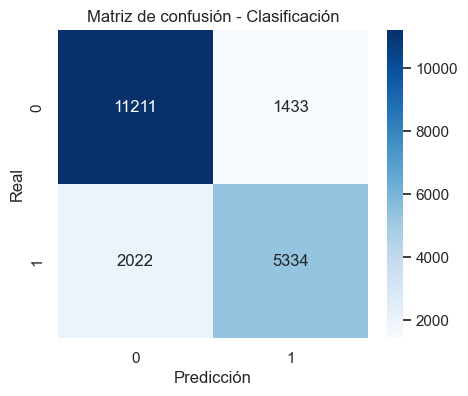


=== IMPORTANCIA DE VARIABLES CLASIFICACIÓN ===
                   feature      coef
7                      age  2.220191
9         medication_count  0.742955
8                      bmi  0.360396
2  alcohol_freq_Occasional  0.068848
3      alcohol_freq_Weekly  0.050347
4         alcohol_freq_nan  0.031996
5                 sex_Male  0.029711
6                sex_Other  0.016256
1             smoker_Never -3.255660
0            smoker_Former -3.263613

Variables que AUMENTAN la probabilidad de high risk:
                   feature      coef
7                      age  2.220191
9         medication_count  0.742955
8                      bmi  0.360396
2  alcohol_freq_Occasional  0.068848
3      alcohol_freq_Weekly  0.050347
4         alcohol_freq_nan  0.031996
5                 sex_Male  0.029711
6                sex_Other  0.016256

Variables que REDUCEN la probabilidad de high risk:
         feature      coef
1   smoker_Never -3.255660
0  smoker_Former -3.263613

=== MÉTRICAS MODELO REG

In [ ]:

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, r2_score, mean_squared_error
)


df = pd.read_csv("medical_insurance.csv")


LIFESTYLE_CAT = ["smoker", "alcohol_freq", "sex"]
LIFESTYLE_NUM = [
    "age", "bmi",
    "medication_count"
]


LIFESTYLE_CAT = [c for c in LIFESTYLE_CAT if c in df.columns]
LIFESTYLE_NUM = [c for c in LIFESTYLE_NUM if c in df.columns]


TARGET = "is_high_risk"

X = df[LIFESTYLE_CAT + LIFESTYLE_NUM]
y = df[TARGET]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), LIFESTYLE_CAT),
        ("num", StandardScaler(), LIFESTYLE_NUM)  
    ]
)

clf = LogisticRegression(max_iter=5000)

pipe_clf = Pipeline([
    ("prep", preprocess),
    ("clf", clf)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipe_clf.fit(X_train, y_train)


y_pred = pipe_clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=== MÉTRICAS MODELO CLASIFICACIÓN ===")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:\n", cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión - Clasificación")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

ohe = pipe_clf.named_steps["prep"].named_transformers_["cat"]
cat_names = ohe.get_feature_names_out(LIFESTYLE_CAT)
all_features = list(cat_names) + LIFESTYLE_NUM

coef = pipe_clf.named_steps["clf"].coef_[0]

coef_df = pd.DataFrame({"feature": all_features, "coef": coef})
coef_df = coef_df.sort_values("coef", ascending=False)

print("\n=== IMPORTANCIA DE VARIABLES CLASIFICACIÓN ===")
print(coef_df)


positive = coef_df[coef_df["coef"] > 0]
negative = coef_df[coef_df["coef"] < 0]

print("\nVariables que AUMENTAN la probabilidad de high risk:")
print(positive)

print("\nVariables que REDUCEN la probabilidad de high risk:")
print(negative)


TARGET_REG = "annual_medical_cost"

X_reg = df[LIFESTYLE_CAT + LIFESTYLE_NUM]
y_reg = df[TARGET_REG]

pipe_reg = Pipeline([
    ("prep", preprocess),
    ("model", LinearRegression())
])

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

pipe_reg.fit(Xr_train, yr_train)


yr_pred = pipe_reg.predict(Xr_test)

r2 = r2_score(yr_test, yr_pred)
rmse = np.sqrt(mean_squared_error(yr_test, yr_pred))

print("\n=== MÉTRICAS MODELO REGRESIÓN ===")
print("R²:", r2)
print("RMSE:", rmse)


lin = pipe_reg.named_steps["model"]
coef_reg = lin.coef_

coef_reg_df = pd.DataFrame({"feature": all_features, "coef": coef_reg})
coef_reg_df = coef_reg_df.sort_values("coef", ascending=False)

print("\n=== IMPORTANCIA DE VARIABLES REGRESIÓN ===")
print(coef_reg_df)

print("\nVariables que MÁS AUMENTAN el coste médico:")
print(coef_reg_df.head())

print("\nVariables que REDUCEN el coste médico:")
print(coef_reg_df.tail())
